# LAB | A/B Testing in Python

### Challenge 1: 🚀 *Comparing Two Website Versions Using Hypothesis Testing*  

### **Objective**: 
Perform an A/B test to determine if a new webpage design (`Version B`) leads to a higher **click-through rate (CTR)** than the original (`Version A`).  

#### 📌 **Project Overview**  
We’ll:  
1. **Simulate** A/B test data (users & clicks).  
2. **Analyze** the results using statistical tests.  
3. **Conclude** whether `Version B` performs better.  



### **Problem Statement**  
You are a data analyst at an e-commerce company. The team wants to test if a new webpage design (`Version B`) increases click-through rates (CTR) compared to the original (`Version A`).  

### **Tasks**  
1. **Simulate Data**:  
   - Generate synthetic data for `Version A` (1000 visitors, 150 clicks) and `Version B` (1050 visitors, 180 clicks).  
2. **Statistical Test**:  
   - Perform a **Statistical Test** to compare CTRs.  
3. **Interpretation**:  
   - Determine if the difference is statistically significant (use α = 0.05).  
4. **Visualization**:  
   - Plot the CTRs for both versions using appropriate chart.  

**Deliverables**:  
- Code for simulation, testing, and visualization.  
- Written conclusion (1–2 sentences) on whether `Version B` performs better.  

#### 🛠 **Setup & Data Generation**  
First, let’s create synthetic data for the experiment.  


In [35]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

> Simulate User Data, We’ll assume:

- Version A: 1000 visitors, 150 clicks.

- Version B: 1050 visitors, 180 clicks.

In [2]:
# Simulate data
np.random.seed(42)
visitors_a = 1000
clicks_a = 150
visitors_b = 1050
clicks_b = 180

In [16]:
# Generate DataFrame for Version A
data_a = {'Visitor_A': range(1, visitors_a + 1), 
          'Clicked': [1 if i < clicks_a else 0 for i in range(visitors_a)]}
df_a = pd.DataFrame(data_a)

# Generate DataFrame for Version B
data_b = {'Visitor_B': range(1, visitors_b + 1), 
          'Clicked': [1 if i < clicks_b else 0 for i in range(visitors_b)]}
df_b = pd.DataFrame(data_b)

# Display the first few rows of each DataFrame
print("Version A DataFrame:")
print(df_a.head())
print("\nVersion B DataFrame:")
print(df_b.head())

Version A DataFrame:
   Visitor_A  Clicked
0          1        1
1          2        1
2          3        1
3          4        1
4          5        1

Version B DataFrame:
   Visitor_B  Clicked
0          1        1
1          2        1
2          3        1
3          4        1
4          5        1


📊 Perform A/B Test
We’ll use a Chi-Square Test to compare proportions.

- Hypotheses

In [17]:
df_a_grouped = df_a[["Clicked", "Visitor_A"]].groupby("Clicked").count()
df_b_grouped = df_b[["Clicked", "Visitor_B"]].groupby("Clicked").count()

In [23]:
df_combined = pd.concat([df_a_grouped, df_b_grouped], axis=1)

In [32]:
# Null Hypothesis (H₀): `feature has no impact`.
# Alternative Hypothesis `feature has an impact`.
stat, p_value, dof, expected = stats.chi2_contingency(df_combined)

In [33]:
p_value

np.float64(0.20785388523374118)

In [ ]:
# -> no impact

📈 Visualization

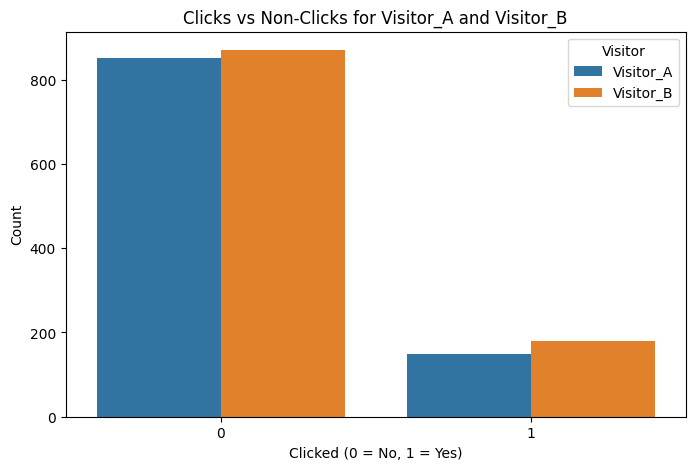

In [68]:

# Melt the dataframe for easier plotting with seaborn
df_melted = df_combined.reset_index().melt(id_vars='Clicked', var_name='Visitor', value_name='Count')

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Clicked', y='Count', hue='Visitor', data=df_melted)

plt.title('Clicks vs Non-Clicks for Visitor_A and Visitor_B')
plt.xlabel('Clicked (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


## Challenge 2: 🚀 A/B Testing Challenge with Real Data

#### **Objective**:  
1. Analyze **real A/B test data** (from Kaggle) to compare conversion rates.  
2. Use **bootstrapping** to estimate confidence intervals.  

---

#### 📌 **Project Overview**  
We’ll:  
1. **Load real A/B test data** (user sessions and conversions).  
2. **Compare conversion rates** using statistical tests.  
3. **Apply bootstrapping** to validate results.  



### **Problem Statement**  
Use the [Kaggle Marketing A/B Test dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) to analyze if a new marketing campaign (`Group B`) improves conversion rates over the old campaign (`Group A`).  

### **Tasks**  
1. **Data Preparation**:  
   - Load the dataset and explore key metrics (sample sizes, conversion rates).  
2. **Hypothesis Testing**:  
   - Perform a **Statistical Test** to compare conversions between groups.  
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.  
4. **Visualization**:  
   -Compare conversion rates for both groups.  

**Deliverables**:  
- Code for analysis and bootstrapping.  
- Answers:  
  - P-value and statistical conclusion.  
  - Confidence intervals for both groups.  

#### 🛠 **Setup & Data Loading**  


> Load Open-Source Dataset
We’ll use the ["A/B Test Results"](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) dataset from Kaggle.

In [73]:
# Load data (ensure CSV is in your working directory)
data = pd.read_csv("./data/marketing_AB.csv")  # Download from Kaggle first!

In [74]:
data.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


📊 Part 1: Traditional A/B Test
> Calculate Conversion Rates

In [82]:
# TODO
# Insert your code HERE
conversion_per_category = data[["test group", "converted"]]

In [99]:
contingency_table = pd.crosstab(data["test group"], data["converted"])

> Statistical Test

In [139]:
# Insert your code HERE
stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(p_value)

1.9989623063390075e-13


In [140]:
from statsmodels.stats.proportion import proportions_ztest
# Counts of conversions (successes)
counts = [
    contingency_table.loc["ad", True],   # Group B (ad)
    contingency_table.loc["psa", True]   # Group A (psa)
]

# Total observations per group
nobs = [
    contingency_table.loc["ad", True] + contingency_table.loc["ad", False],
    contingency_table.loc["psa", True] + contingency_table.loc["psa", False]
]

# Run z-test
stat, pval = proportions_ztest(count=counts, nobs=nobs, alternative='larger')  # use 'larger' if B > A is your hypothesis
stat, pval

(np.float64(7.3700781265454145), np.float64(8.526403580779863e-14))

#### EXTRA 📈 Part 2: Bootstrapping Challenge
**Why Bootstrapping?**
 - Bootstrapping helps estimate confidence intervals for conversion rates by resampling data.
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.
> Bootstrap Function

In [143]:
contingency_table

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [141]:
# Insert your code HERE
n=1000
sample_size = 50

population = data["converted"]

In [ ]:
np.choose()

In [145]:
# Step 1: Convert 'converted' column to integer for easier math (optional)
data['converted'] = data['converted'].astype(int)  # True → 1, False → 0

# Step 2: Create separate arrays for each group
ad_data = data[data['test group'] == 'ad']['converted'].values
psa_data = data[data['test group'] == 'psa']['converted'].values

# Step 3: Bootstrapping function (same as before)
def bootstrap_conversion(data, n_iterations=1000):
    n = len(data)
    return np.array([
        np.mean(np.random.choice(data, size=n, replace=True))
        for _ in range(n_iterations)
    ])

# Step 4: Run bootstrapping
ad_boot = bootstrap_conversion(ad_data)
psa_boot = bootstrap_conversion(psa_data)

# Step 5: Confidence intervals
ad_ci = np.percentile(ad_boot, [2.5, 97.5])
psa_ci = np.percentile(psa_boot, [2.5, 97.5])

# Optional: Difference in conversion rates
diff_boot = ad_boot - psa_boot
diff_ci = np.percentile(diff_boot, [2.5, 97.5])


>Visualize Resultsm

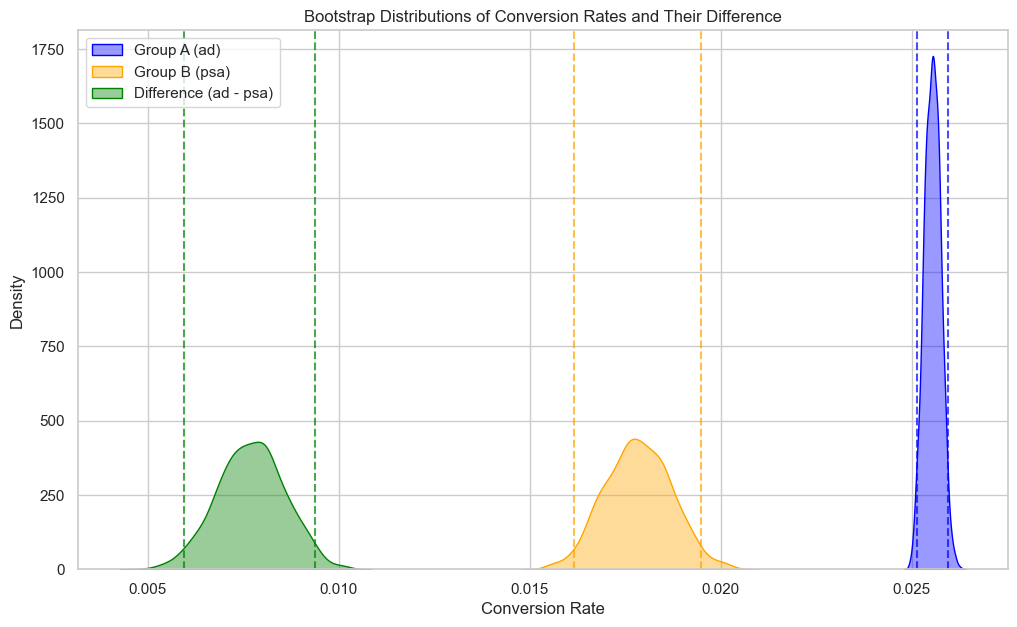

In [157]:
# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 7))

# Plot bootstrapped conversion rates
sns.kdeplot(ad_boot, label='Group A (ad)', fill=True, color='blue', alpha=0.4)
sns.kdeplot(psa_boot, label='Group B (psa)', fill=True, color='orange', alpha=0.4)

# Plot difference in conversion rates
sns.kdeplot(diff_boot, label='Difference (ad - psa)', fill=True, color='green', alpha=0.4)

# Mark confidence intervals with vertical lines
for ci, color, label in zip([ad_ci, psa_ci, diff_ci], ['blue', 'orange', 'green'], ['ad CI', 'psa CI', 'diff CI']):
    plt.axvline(ci[0], color=color, linestyle='--', alpha=0.7)
    plt.axvline(ci[1], color=color, linestyle='--', alpha=0.7)

plt.title('Bootstrap Distributions of Conversion Rates and Their Difference')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.legend()
plt.show()

## (Bonus) Challenge 3: 🎮 Advanced A/B Testing Challenge: Cookie Cats Retention Analysis 

#### **Objective**:  
1. Analyze player **retention rates** in the `cookie_cats` mobile game A/B test.  
2. Implement **sequential testing** (to avoid peeking at results prematurely).  
3. Conduct **power analysis** to determine optimal sample size.  

### **Problem Statement**  
Analyze the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) to determine if moving the game’s first gate from level 30 (`gate_30`) to level 40 (`gate_40`) affects player retention.  

### **Tasks**  
1. **Retention Analysis**:  
   - Compare **1-day retention rates** between `gate_30` and `gate_40` using a Z-test.  
2. **Sequential Testing**:  
   - Simulate checking results at intervals (every 500 users) to avoid "peeking bias."  
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8).  
4. **Optional**:  
   - Repeat analysis for **7-day retention**.  

**Deliverables**:  
- Code for retention comparison, sequential testing, and power analysis.  
- Written summary:  
  - Does `gate_40` significantly impact retention?  
  - How does sequential testing affect decision-making?  



### 🛠 **Setup & Data Loading**  


In [158]:
# Load dataset 
data = pd.read_csv("./data/cookie_cats.csv")  # Columns: userid, version, sum_gamerounds, retention_1, retention_7

In [159]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


📊 Part 1: Retention Rate Analysis
> Compare 1-Day Retention

In [163]:
# TODO
# Insert your code HERE
data["retention_1"] = data["retention_1"].astype("int")
data["retention_7"] = data["retention_7"].astype("int")

> Statistical Test

In [175]:
n_gate_30 = len(data[data["version"] == "gate_30"])
n_gate_40 = len(data[data["version"] == "gate_40"])

success_gate_30 = data.loc[data["version"] == "gate_30", "retention_1"].sum()
success_gate_40 = data.loc[data["version"] == "gate_40", "retention_1"].sum()

stat, pval = proportions_ztest([success_gate_40, success_gate_30], [n_gate_40, n_gate_30], alternative="larger")


print(f"Z-statistic: {stat:.3f}, p-value: {pval:.4f}")

Z-statistic: -1.784, p-value: 0.9628


📈 Part 2: Sequential Testing
>  Why Sequential Testing?

- Avoids "peeking" at results prematurely by checking at intervals.

In [178]:
# Insert your code HERE
n = 500

In [183]:
chunks = np.array_split(data, len(data) // n)

In [ ]:
def z_test(df, ret="retention_1"):
    n_gate_30 = len(df[df["version"] == "gate_30"])
    n_gate_40 = len(df[df["version"] == "gate_40"])
    
    success_gate_30 = df.loc[df["version"] == "gate_30", ret].sum()
    success_gate_40 = df.loc[df["version"] == "gate_40", ret].sum()

    _, pval = proportions_ztest([success_gate_40, success_gate_30], [n_gate_40, n_gate_30], alternative="larger")

    return pval

In [188]:
p_values = []
for chunk in chunks:
    p_values.append(z_test(chunk))

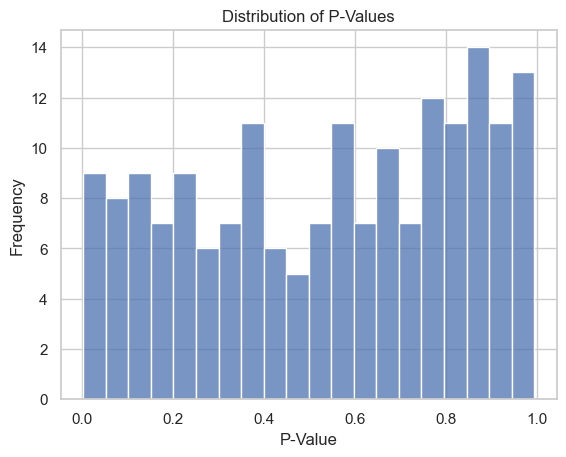

In [193]:
sns.histplot(p_values, bins=20)
plt.title("Distribution of P-Values")
plt.xlabel("P-Value")
plt.ylabel("Frequency")
plt.show()

⚡ Part 3: Power Analysis
>  Determine Required Sample Size
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8). 

In [211]:
alpha = 0.05
power = 0.8
mde = 0.02

success_rate = success_gate_30 / n_gate_30

alpha_z_score = - stats.norm.ppf(alpha/2)
power_z_score = stats.norm.ppf(power)

In [212]:
(2*success_rate*(1-success_rate))/ (mde / (alpha_z_score + power_z_score))**2 # = n

np.float64(9705.748405840144)

In [217]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Inputs
alpha = 0.05
power = 0.8
p1 = success_gate_30 / n_gate_30  # baseline rate (e.g., 0.2)
p2 = p1 + 0.02  # we want to detect a 2% absolute increase

# Compute effect size using Cohen's h
effect_size = proportion_effectsize(p1, p2)

# Solve for required sample size (per group)
analysis = NormalIndPower()
n_required = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, alternative='two-sided')

print(f"Required sample size per group: {int(n_required)}")


Required sample size per group: 9741


Enjoy & Happy A/B Testing :) ......!